In [329]:
#import SparkSession
from pyspark.sql import SparkSession
#create spar session object
spark=SparkSession.builder.appName('supervised_ml').getOrCreate()

# Regression 

In [331]:
df=spark.read.csv('Linear_regression_dataset.csv',inferSchema=True,header=True)

In [332]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler


In [333]:
print((df.count(), len(df.columns)))

(1232, 6)


In [6]:
df.show(10)

+-----+-----+-----+-----+-----+-----+
|var_1|var_2|var_3|var_4|var_5|label|
+-----+-----+-----+-----+-----+-----+
|  734|  688|   81|0.328|0.259|0.418|
|  700|  600|   94| 0.32|0.247|0.389|
|  712|  705|   93|0.311|0.247|0.417|
|  734|  806|   69|0.315| 0.26|0.415|
|  613|  759|   61|0.302| 0.24|0.378|
|  748|  676|   85|0.318|0.255|0.422|
|  669|  588|   97|0.315|0.251|0.411|
|  667|  845|   68|0.324|0.251|0.381|
|  758|  890|   64| 0.33|0.274|0.436|
|  726|  670|   88|0.335|0.268|0.422|
+-----+-----+-----+-----+-----+-----+
only showing top 10 rows



In [334]:
df_assembler = VectorAssembler(inputCols=['var_1', 'var_2', 'var_3', 'var_4', 'var_5'], outputCol="features")
df = df_assembler.transform(df) 

In [335]:
df.select(['features','label']).show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[734.0,688.0,81.0...|0.418|
|[700.0,600.0,94.0...|0.389|
|[712.0,705.0,93.0...|0.417|
|[734.0,806.0,69.0...|0.415|
|[613.0,759.0,61.0...|0.378|
|[748.0,676.0,85.0...|0.422|
|[669.0,588.0,97.0...|0.411|
|[667.0,845.0,68.0...|0.381|
|[758.0,890.0,64.0...|0.436|
|[726.0,670.0,88.0...|0.422|
|[583.0,794.0,55.0...|0.371|
|[676.0,746.0,72.0...|  0.4|
|[767.0,699.0,89.0...|0.433|
|[637.0,597.0,86.0...|0.374|
|[609.0,724.0,69.0...|0.382|
|[776.0,733.0,83.0...|0.437|
|[701.0,832.0,66.0...| 0.39|
|[650.0,709.0,74.0...|0.386|
|[804.0,668.0,95.0...|0.453|
|[713.0,614.0,94.0...|0.404|
+--------------------+-----+
only showing top 20 rows



In [337]:
train, test = df.randomSplit([0.75, 0.25])
print(f"Size of train Dataset : {train.count()}" )
print(f"Size of test Dataset : {test.count()}" )



Size of train Dataset : 911
Size of test Dataset : 321


In [338]:
lr = LinearRegression()

In [339]:
# Fit the model
lr_model = lr.fit(train)

In [ ]:
predictions_df=lr_model.transform(test)

In [ ]:
predictions_df.show()

In [340]:
model_predictions=lr_model.evaluate(test)


In [345]:
print(model_predictions.r2)

0.8855561089304634


In [346]:
print(model_predictions.meanSquaredError)


0.00013305453514672318


In [348]:
#import the GLM model
from pyspark.ml.regression import GeneralizedLinearRegression


In [365]:
glr = GeneralizedLinearRegression()


In [366]:
glr_model = glr.fit(train)

In [351]:
glr_model.coefficients

DenseVector([0.0003, 0.0001, 0.0002, -0.6258, 0.461])

In [352]:
glr_model.summary

Coefficients:
    Feature Estimate Std Error T Value P Value
(Intercept)   0.1887    0.0169 11.1450  0.0000
      var_1   0.0003    0.0000 22.5404  0.0000
      var_2   0.0001    0.0000  4.3525  0.0000
      var_3   0.0002    0.0001  1.7469  0.0810
      var_4  -0.6258    0.0707 -8.8489  0.0000
      var_5   0.4610    0.0626  7.3697  0.0000

(Dispersion parameter for gaussian family taken to be 0.0001)
    Null deviance: 0.9886 on 905 degrees of freedom
Residual deviance: 0.1355 on 905 degrees of freedom
AIC: -5429.3467

In [367]:
model_predictions=glr_model.evaluate(test)


In [368]:
model_predictions.predictions.show()

+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|var_1|var_2|var_3|var_4|var_5|label|            features|         prediction|
+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|  473|  499|   73|0.281|0.228|0.315|[473.0,499.0,73.0...| 0.3168228205906638|
|  498|  672|   61|0.288|0.238|0.325|[498.0,672.0,61.0...|0.33224574821552433|
|  513|  698|   61|0.298|0.236|0.339|[513.0,698.0,61.0...| 0.3314803948399759|
|  527|  569|   75|0.297|0.239|0.341|[527.0,569.0,75.0...| 0.3341226140464902|
|  532|  690|   69|0.303|0.245|0.351|[532.0,690.0,69.0...| 0.3399564421746622|
|  534|  609|   69|0.304|0.229|0.329|[534.0,609.0,69.0...|0.32848240366793496|
|  536|  531|   83|0.292|0.214|0.318|[536.0,531.0,83.0...|  0.328257290790113|
|  541|  830|   60|0.302|0.229| 0.33|[541.0,830.0,60.0...| 0.3418227186125283|
|  543|  615|   76|0.294|0.233|0.333|[543.0,615.0,76.0...|0.34119126494490326|
|  550|  631|   76|0.306|0.235|0.318|[550.0,631.0,76

In [369]:
model_predictions.aic

-1939.8866851859273

In [359]:
glr = GeneralizedLinearRegression(family='Binomial')
glr_model = glr.fit(train)
model_predictions=glr_model.evaluate(test)
model_predictions.aic

336.9915101112133

In [360]:
glr = GeneralizedLinearRegression(family='Poisson')
glr_model = glr.fit(train)
model_predictions=glr_model.evaluate(test)
model_predictions.aic

266.53028779813695

In [364]:

glr = GeneralizedLinearRegression(family='Gamma')
glr_model = glr.fit(train)
model_predictions=glr_model.evaluate(test)
model_predictions.aic

-1903.815764540875

In [363]:
glr = GeneralizedLinearRegression(family='Tweedie')
glr_model = glr.fit(train)
model_predictions=glr_model.evaluate(test)
model_predictions.aic

-1939.8866851859273

In [370]:
from pyspark.ml.regression import DecisionTreeRegressor


In [371]:
dec_tree = DecisionTreeRegressor()

In [372]:
# Train model.  This also runs the indexer.
dec_tree_model = dec_tree.fit(train)


In [373]:
dec_tree_model.featureImportances

SparseVector(5, {0: 0.9667, 1: 0.0124, 2: 0.0045, 3: 0.0053, 4: 0.0112})

In [105]:
# Make predictions.
model_predictions = dec_tree_model.transform(test)

In [106]:
model_predictions.show()

+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|var_1|var_2|var_3|var_4|var_5|label|            features|         prediction|
+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|  464|  640|   66|0.283| 0.22|0.301|[464.0,640.0,66.0...|            0.31925|
|  501|  774|   51|0.285|0.219|0.315|[501.0,774.0,51.0...|               0.33|
|  533|  660|   62|0.296|0.233| 0.33|[533.0,660.0,62.0...|               0.33|
|  534|  609|   69|0.304|0.229|0.329|[534.0,609.0,69.0...|            0.31925|
|  559|  613|   75|0.293|0.235|0.359|[559.0,613.0,75.0...|0.34612195121951217|
|  562|  587|   80|0.308|0.235|0.344|[562.0,587.0,80.0...|0.34612195121951217|
|  564|  648|   74|0.294|0.236|0.337|[564.0,648.0,74.0...|0.34612195121951217|
|  568|  708|   57|0.311|0.247|0.347|[568.0,708.0,57.0...|0.34612195121951217|
|  569|  544|   82|0.304| 0.24|0.343|[569.0,544.0,82.0...|0.34612195121951217|
|  571|  577|   83|0.298|0.251|0.368|[571.0,577.0,83

In [107]:
from pyspark.ml.evaluation import RegressionEvaluator


In [111]:
# R2 value of the model on test data 
dt_evaluator = RegressionEvaluator(metricName='r2')
dt_r2 = dt_evaluator.evaluate(model_predictions)
print(f'The r-square value of DecisionTreeRegressor is {dt_r2}')

# RMSE value of the model on test data 
dt_evaluator = RegressionEvaluator(metricName='rmse')
dt_rmse = dt_evaluator.evaluate(model_predictions)
print(f'The rmse value of DecisionTreeRegressor is {dt_rmse}')



The r-square value of DecisionTreeRegressor is 0.8093834699203476
The rmse value of DecisionTreeRegressor is 0.014111932287681688


In [374]:
from pyspark.ml.regression import RandomForestRegressor


In [122]:
rf = RandomForestRegressor()

In [123]:
# Train model.  This also runs the indexer.
rf_model = rf.fit(train)


In [125]:
rf_model.featureImportances

SparseVector(5, {0: 0.4395, 1: 0.045, 2: 0.0243, 3: 0.2725, 4: 0.2188})

In [126]:
rf_model.getNumTrees

20

In [132]:
model_predictions = rf_model.transform(test)

In [133]:
model_predictions.show()

+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|var_1|var_2|var_3|var_4|var_5|label|            features|         prediction|
+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|  464|  640|   66|0.283| 0.22|0.301|[464.0,640.0,66.0...|0.32620528864346005|
|  501|  774|   51|0.285|0.219|0.315|[501.0,774.0,51.0...| 0.3315483384956547|
|  533|  660|   62|0.296|0.233| 0.33|[533.0,660.0,62.0...| 0.3279678481672696|
|  534|  609|   69|0.304|0.229|0.329|[534.0,609.0,69.0...|0.32849289839181284|
|  559|  613|   75|0.293|0.235|0.359|[559.0,613.0,75.0...|0.34431157381674565|
|  562|  587|   80|0.308|0.235|0.344|[562.0,587.0,80.0...|0.34633939901939004|
|  564|  648|   74|0.294|0.236|0.337|[564.0,648.0,74.0...|0.34660634825283587|
|  568|  708|   57|0.311|0.247|0.347|[568.0,708.0,57.0...| 0.3580627405761989|
|  569|  544|   82|0.304| 0.24|0.343|[569.0,544.0,82.0...| 0.3489929326622356|
|  571|  577|   83|0.298|0.251|0.368|[571.0,577.0,83

In [135]:
# Select (prediction, true label) and compute test error
# R2 value of the model on test data 
rf_evaluator = RegressionEvaluator(metricName='r2')
rf_r2 = rf_evaluator.evaluate(model_predictions)
print(f'The r-square value of RandomForestRegressor is {rf_r2}')

# RMSE value of the model on test data 
rf_evaluator = RegressionEvaluator(metricName='rmse')
rf_rmse = rf_evaluator.evaluate(model_predictions)
print(f'The rmse value of RandomForestRegressor is {rf_rmse}')


The r-square value of RandomForestRegressor is 0.8215863293044671
The rmse value of RandomForestRegressor is 0.01365275410722947


In [375]:
from pyspark.ml.regression import GBTRegressor


In [376]:
gbt = GBTRegressor()

In [377]:
# Train model.  This also runs the indexer.
gbt_model = gbt.fit(train)


In [378]:
gbt_model.featureImportances

SparseVector(5, {0: 0.2632, 1: 0.1731, 2: 0.2107, 3: 0.2369, 4: 0.1161})

In [379]:
model_predictions = gbt_model.transform(test)

In [380]:
model_predictions.show()

+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|var_1|var_2|var_3|var_4|var_5|label|            features|         prediction|
+-----+-----+-----+-----+-----+-----+--------------------+-------------------+
|  473|  499|   73|0.281|0.228|0.315|[473.0,499.0,73.0...|0.31944398058332746|
|  498|  672|   61|0.288|0.238|0.325|[498.0,672.0,61.0...|0.34408906567588476|
|  513|  698|   61|0.298|0.236|0.339|[513.0,698.0,61.0...|0.34431612842121734|
|  527|  569|   75|0.297|0.239|0.341|[527.0,569.0,75.0...|0.34117798058332727|
|  532|  690|   69|0.303|0.245|0.351|[532.0,690.0,69.0...|0.33924893158758207|
|  534|  609|   69|0.304|0.229|0.329|[534.0,609.0,69.0...| 0.3173858203666073|
|  536|  531|   83|0.292|0.214|0.318|[536.0,531.0,83.0...|0.32116220648685906|
|  541|  830|   60|0.302|0.229| 0.33|[541.0,830.0,60.0...|0.32107791151173165|
|  543|  615|   76|0.294|0.233|0.333|[543.0,615.0,76.0...| 0.3191040462701389|
|  550|  631|   76|0.306|0.235|0.318|[550.0,631.0,76

In [381]:
 #Select (prediction, true label) and compute test error
# R2 value of the model on test data 
gbt_evaluator = RegressionEvaluator(metricName='r2')
gbt_r2 = gbt_evaluator.evaluate(model_predictions)
print(f'The r-square value of GradientBoostedRegressor is {gbt_r2}')

# RMSE value of the model on test data 
gbt_evaluator = RegressionEvaluator(metricName='rmse')
gbt_rmse = gbt_evaluator.evaluate(model_predictions)
print(f'The rmse value of GradientBoostedRegressor is {gbt_rmse}')


The r-square value of GradientBoostedRegressor is 0.8477273892307596
The rmse value of GradientBoostedRegressor is 0.013305445803592103


 # Classification 

In [382]:
# Load csv Dataset 
df=spark.read.csv('bank_data.csv',inferSchema=True,header=True)

In [383]:
#number of records
df.count()

41188

In [384]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'target_class']

In [4]:
#dataype of input data 
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- target_class: string (nullable = true)



In [7]:
df.groupBy('target_class').count().show()

+------------+-----+
|target_class|count|
+------------+-----+
|          no|36548|
|         yes| 4640|
+------------+-----+



In [395]:
## Sample Data 

df=spark.read.csv('binary_class.csv',inferSchema=True,header=True)

In [396]:
df.count()

9501

In [397]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'target_class']

In [398]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- target_class: string (nullable = true)



In [399]:
df.groupBy('target_class').count().show()

+------------+-----+
|target_class|count|
+------------+-----+
|          no| 4861|
|         yes| 4640|
+------------+-----+



In [400]:
from pyspark.sql import functions as F
from pyspark.sql import *

In [401]:
df=df.withColumn("label", F.when(df.target_class =='no', F.lit(0)).otherwise(F.lit(1)))

In [402]:
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 4640|
|    0| 4861|
+-----+-----+



In [403]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler


In [404]:
def cat_to_num(df):
    
    for col in df.columns:
        stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_index")
        model = stringIndexer.fit(df)
        indexed = model.transform(df)

        encoder = OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec")
        df = encoder.transform(indexed)
    df_assembler = VectorAssembler(inputCols=['age','marital_vec','education_vec','default_vec','housing_vec','loan_vec'], outputCol="features")
    df = df_assembler.transform(df)  
    return df.select(['features','label'])

In [405]:
df_new=cat_to_num(df)

In [406]:
df_new.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(16,[0,1,8,11,13,...|    0|
|(16,[0,1,5,13,14]...|    0|
|(16,[0,1,5,11,12,...|    0|
|(16,[0,1,9,11,13,...|    0|
|(16,[0,1,5,11,13,...|    0|
|(16,[0,1,6,13,14]...|    0|
|(16,[0,1,7,11,13,...|    0|
|(16,[0,1,10,13,14...|    0|
|(16,[0,2,7,11,12,...|    0|
|(16,[0,2,5,11,12,...|    0|
|(16,[0,1,10,13,14...|    0|
|(16,[0,2,5,11,12,...|    0|
|(16,[0,2,5,11,13,...|    0|
|(16,[0,3,8,11,12,...|    0|
|(16,[0,1,9,11,12,...|    0|
|(16,[0,1,6,12,15]...|    0|
|(16,[0,1,9,11,12,...|    0|
|(16,[0,1,9,12,15]...|    0|
|(16,[0,1,6,11,12,...|    0|
|(16,[0,2,6,13,14]...|    0|
+--------------------+-----+
only showing top 20 rows



In [407]:
df_new.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 4640|
|    0| 4861|
+-----+-----+



In [408]:
train, test = df_new.randomSplit([0.75, 0.25])
print(f"Size of train Dataset : {train.count()}" )
print(f"Size of test Dataset : {test.count()}" )


Size of train Dataset : 7112
Size of test Dataset : 2389


In [409]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(train)

In [410]:
print(lr_model.coefficients)

[0.0273012403206,0.0860736571977,0.934384469874,-0.016522545073,-12.9801090231,-13.469005707,-13.8118640649,-13.3288968418,-13.6023406483,-13.7420942762,-13.2940419118,1.3921700408,0.29133718088,-0.0418899174088,0.248880549172,0.218739541667]


In [411]:
lr_summary=lr_model.summary

In [412]:
lr_summary.accuracy

0.6732283464566929

In [413]:
lr_summary.areaUnderROC

0.7161951680555275

In [414]:

print(lr_summary.precisionByLabel)

[0.6948130277442702, 0.6543730242360379]


In [415]:
lr_summary.precisionByThreshold.show()

+------------------+------------------+
|         threshold|         precision|
+------------------+------------------+
|0.9999990369941395|0.8378378378378378|
|0.8220499817791618|0.7647058823529411|
|0.7968126369992325|0.7734806629834254|
| 0.773470522075655|0.7892857142857143|
|0.7612946912751203|0.7645502645502645|
|0.7490362058233141|0.7540983606557377|
|0.7382521496703287|0.7345132743362832|
|0.7279553838380405|0.7336448598130841|
|0.7193784940839227|0.7327823691460055|
|0.7122887285503471|0.7333333333333333|
|0.7047990854701919|0.7276736493936052|
|0.6983210316089354|0.7244174265450861|
|0.6895039811348334|0.7183226982680037|
|0.6828171155434885|0.7237615449202351|
|0.6769693285452459|0.7262658227848101|
|0.6702627333842052|  0.72619926199262|
|0.6639336170490286|0.7254355400696864|
|0.6574455562430638|0.7240924092409241|
|0.6519155436691656|0.7210327455919395|
|0.6462446109735182|0.7204628501827041|
+------------------+------------------+
only showing top 20 rows



In [416]:
precision_threshold

,threshold,precision
0,0.999997,0.888889
1,0.822831,0.758242
2,0.796765,0.720779
3,0.781076,0.775362
4,0.765103,0.765714
5,0.754244,0.748869
6,0.744988,0.735010
7,0.734741,0.730263
8,0.724762,0.733529
9,0.715474,0.737047


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


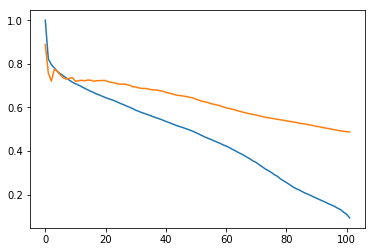

In [417]:
plt.plot(precision_threshold)
plt.legend(loc='upper left')
plt.show()

In [418]:
lr_summary.recallByLabel

[0.6371681415929203, 0.7105263157894737]

In [419]:
lr_summary.recallByThreshold.show()

+------------------+--------------------+
|         threshold|              recall|
+------------------+--------------------+
|0.9999990369941395|0.008867276887871853|
|0.8220499817791618|0.018592677345537757|
|0.7968126369992325| 0.04004576659038902|
| 0.773470522075655| 0.06321510297482838|
|0.7612946912751203| 0.08266590389016018|
|0.7490362058233141| 0.10526315789473684|
|0.7382521496703287|  0.1187070938215103|
|0.7279553838380405|  0.1347254004576659|
|0.7193784940839227| 0.15217391304347827|
|0.7122887285503471| 0.16990846681922198|
|0.7047990854701919| 0.18878718535469108|
|0.6983210316089354| 0.20451945080091533|
|0.6895039811348334| 0.22540045766590389|
|0.6828171155434885|  0.2465675057208238|
|0.6769693285452459|  0.2625858123569794|
|0.6702627333842052|  0.2814645308924485|
|0.6639336170490286| 0.29776887871853547|
|0.6574455562430638|  0.3137871853546911|
|0.6519155436691656|  0.3275171624713959|
|0.6462446109735182|  0.3383867276887872|
+------------------+--------------

In [420]:
lr_summary.weightedRecall

0.6732283464566929

In [421]:
lr_summary.weightedPrecision

0.6749341958735193

In [422]:
lr_summary.roc.show()

+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
| 0.00165929203539823|0.008867276887871853|
|0.005530973451327...|0.018592677345537757|
| 0.01133849557522124| 0.04004576659038902|
| 0.01631637168141593| 0.06321510297482838|
| 0.02461283185840708| 0.08266590389016018|
|0.033185840707964605| 0.10526315789473684|
|0.041482300884955754|  0.1187070938215103|
|0.047289823008849555|  0.1347254004576659|
|0.053650442477876106| 0.15217391304347827|
|0.059734513274336286| 0.16990846681922198|
| 0.06830752212389381| 0.18878718535469108|
|  0.0752212389380531| 0.20451945080091533|
| 0.08545353982300885| 0.22540045766590389|
| 0.09098451327433628|  0.2465675057208238|
|  0.0956858407079646|  0.2625858123569794|
|  0.1025995575221239|  0.2814645308924485|
| 0.10896017699115045| 0.29776887871853547|
| 0.11559734513274336|  0.3137871853546911|
| 0.12251106194690266|  0.327517

In [423]:
lr_summary.pr.show()

+--------------------+------------------+
|              recall|         precision|
+--------------------+------------------+
|                 0.0|0.8378378378378378|
|0.008867276887871853|0.8378378378378378|
|0.018592677345537757|0.7647058823529411|
| 0.04004576659038902|0.7734806629834254|
| 0.06321510297482838|0.7892857142857143|
| 0.08266590389016018|0.7645502645502645|
| 0.10526315789473684|0.7540983606557377|
|  0.1187070938215103|0.7345132743362832|
|  0.1347254004576659|0.7336448598130841|
| 0.15217391304347827|0.7327823691460055|
| 0.16990846681922198|0.7333333333333333|
| 0.18878718535469108|0.7276736493936052|
| 0.20451945080091533|0.7244174265450861|
| 0.22540045766590389|0.7183226982680037|
|  0.2465675057208238|0.7237615449202351|
|  0.2625858123569794|0.7262658227848101|
|  0.2814645308924485|  0.72619926199262|
| 0.29776887871853547|0.7254355400696864|
|  0.3137871853546911|0.7240924092409241|
|  0.3275171624713959|0.7210327455919395|
+--------------------+------------

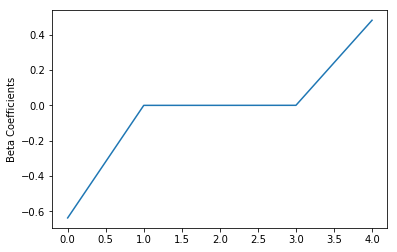

In [424]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()
plt.show()

In [425]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

AttributeError: 'LinearRegressionTrainingSummary' object has no attribute 'roc'

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)


Test Data Evaluation 

In [426]:
model_predictions = lr_model.transform(test)
model_predictions.columns


['features', 'label', 'rawPrediction', 'probability', 'prediction']

In [206]:
model_predictions.select(['label','probability','prediction']).show(10,False)

+-----+----------------------------------------+----------+
|label|probability                             |prediction|
+-----+----------------------------------------+----------+
|1    |[0.7921142321252156,0.2078857678747844] |0.0       |
|0    |[0.7332732992042076,0.2667267007957924] |0.0       |
|0    |[0.7058440774094991,0.294155922590501]  |0.0       |
|0    |[0.5801868096061101,0.41981319039388987]|0.0       |
|1    |[0.5735471647731092,0.42645283522689076]|0.0       |
|1    |[0.5601903397477959,0.4398096602522042] |0.0       |
|0    |[0.5332326656582489,0.46676733434175105]|0.0       |
|1    |[0.5332326656582489,0.46676733434175105]|0.0       |
|1    |[0.5196706190017784,0.48032938099822164]|0.0       |
|1    |[0.4585716734035034,0.5414283265964965] |1.0       |
+-----+----------------------------------------+----------+
only showing top 10 rows



In [427]:
model_predictions = lr_model.evaluate(test)


In [428]:
model_predictions.accuracy

0.6592716617831729

In [429]:
model_predictions.weightedPrecision

0.6627412414584508

In [430]:
model_predictions.weightedRecall

0.6592716617831729

In [431]:
model_predictions.recallByLabel()

[0.6208835341365462, 0.701048951048951]

In [207]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [235]:
# RMSE value of the model on test data 
lr_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
lr_auroc = lr_evaluator.evaluate(model_predictions)
print(f'The auc value of Logistic Regression Model is {lr_auroc}')


# RMSE value of the model on test data 
lr_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
lr_aupr = lr_evaluator.evaluate(model_predictions)
print(f'The aupr value of Logistic Regression Model is {lr_aupr}')


The auc value of Logistic Regression Model is 0.7092938229110143
The aupr value of Logistic Regression Model is 0.6630743130940658


In [236]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()

In [237]:
actual_pos=model_predictions.filter(model_predictions['label']==1).count()

In [238]:
#Recall 
float(true_pos)/(actual_pos)

0.6701030927835051

In [239]:
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [240]:
#Precision
float(true_pos)/(pred_pos)

0.6478405315614618

In [241]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(train)


In [242]:
model_predictions = dt_model.transform(test)


In [243]:
model_predictions.select(['label','probability','prediction']).show(10,False)

+-----+----------------------------------------+----------+
|label|probability                             |prediction|
+-----+----------------------------------------+----------+
|1    |[0.8089887640449438,0.19101123595505617]|0.0       |
|0    |[0.8089887640449438,0.19101123595505617]|0.0       |
|0    |[0.8089887640449438,0.19101123595505617]|0.0       |
|0    |[0.3055555555555556,0.6944444444444444] |1.0       |
|1    |[0.3055555555555556,0.6944444444444444] |1.0       |
|1    |[0.3055555555555556,0.6944444444444444] |1.0       |
|0    |[0.42972350230414746,0.5702764976958525]|1.0       |
|1    |[0.42972350230414746,0.5702764976958525]|1.0       |
|1    |[0.42972350230414746,0.5702764976958525]|1.0       |
|1    |[0.42972350230414746,0.5702764976958525]|1.0       |
+-----+----------------------------------------+----------+
only showing top 10 rows



In [244]:
# RMSE value of the model on test data 
dt_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
dt_auroc = dt_evaluator.evaluate(model_predictions)
print(f'The auc value of Decision Tree Classifier Model is {dt_auroc}')


# RMSE value of the model on test data 
dt_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
dt_aupr = dt_evaluator.evaluate(model_predictions)
print(f'The aupr value of Logistic Regression Model is {dt_aupr}')


The auc value of Decision Tree Classifier Model is 0.516199386190993
The aupr value of Logistic Regression Model is 0.46771834172588167


In [245]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()


In [246]:
actual_pos=model_predictions.filter(model_predictions['label']==1).count()

In [247]:
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [248]:
#Recall 
float(true_pos)/(actual_pos)

0.6907216494845361

In [249]:
#Precision on test Data 
float(true_pos)/(pred_pos)

0.6661143330571665

In [267]:
## RF 

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(numTrees=50,maxDepth=30)
rf_model = rf.fit(train)


In [268]:
model_predictions = rf_model.transform(test)


In [269]:
model_predictions.select(['label','probability','prediction']).show(10,False)

+-----+----------------------------------------+----------+
|label|probability                             |prediction|
+-----+----------------------------------------+----------+
|1    |[0.7791249643670785,0.2208750356329216] |0.0       |
|0    |[0.7950008034402859,0.20499919655971408]|0.0       |
|0    |[0.7753367882511633,0.22466321174883672]|0.0       |
|0    |[0.4400825365852292,0.5599174634147708] |1.0       |
|1    |[0.50177151730653,0.49822848269347]     |0.0       |
|1    |[0.489823569376324,0.510176430623676]   |1.0       |
|0    |[0.48614770456597733,0.5138522954340227]|1.0       |
|1    |[0.48614770456597733,0.5138522954340227]|1.0       |
|1    |[0.46395073486900773,0.5360492651309924]|1.0       |
|1    |[0.46459640878219743,0.5354035912178025]|1.0       |
+-----+----------------------------------------+----------+
only showing top 10 rows



In [270]:
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
rf_auroc = rf_evaluator.evaluate(model_predictions)
print(f'The auc value of RandomForestClassifier Model is {rf_auroc}')



The auc value of RandomForestClassifier Model is 0.7326433634020617


In [271]:
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
rf_aupr = rf_evaluator.evaluate(model_predictions)
print(f'The aupr value of RandomForestClassifier Model is {rf_aupr}')


The aupr value of RandomForestClassifier Model is 0.7277253895494864


In [272]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()
actual_pos=model_predictions.filter(model_predictions['label']==1).count()
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [273]:
#Recall 
float(true_pos)/(actual_pos)

0.6666666666666666

In [274]:
#Precision on test Data 
float(true_pos)/(pred_pos)

0.6672398968185727

In [276]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier()
gbt_model = gbt.fit(train)
model_predictions = gbt_model.transform(test)


In [277]:
model_predictions.select(['label','probability','prediction']).show(10,False)

+-----+----------------------------------------+----------+
|label|probability                             |prediction|
+-----+----------------------------------------+----------+
|1    |[0.8118906324166552,0.18810936758334484]|0.0       |
|0    |[0.8045448087863976,0.19545519121360244]|0.0       |
|0    |[0.7451850305979334,0.2548149694020666] |0.0       |
|0    |[0.30631795902192194,0.6936820409780781]|1.0       |
|1    |[0.31352609339453574,0.6864739066054643]|1.0       |
|1    |[0.3281403432684641,0.6718596567315359] |1.0       |
|0    |[0.5130658281231842,0.48693417187681576]|0.0       |
|1    |[0.5130658281231842,0.48693417187681576]|0.0       |
|1    |[0.48461420867158717,0.5153857913284128]|1.0       |
|1    |[0.4717208467161091,0.5282791532838909] |1.0       |
+-----+----------------------------------------+----------+
only showing top 10 rows



In [278]:
gbt_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
gbt_auroc = gbt_evaluator.evaluate(model_predictions)
print(f'The auc value of GradientBoostedTreesClassifier  is {gbt_auroc}')



The auc value of GradientBoostedTreesClassifier  is 0.7392410330756018


In [279]:
gbt_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
gbt_aupr = gbt_evaluator.evaluate(model_predictions)
print(f'The aupr value of GradientBoostedTreesClassifier Model is {gbt_aupr}')


The aupr value of GradientBoostedTreesClassifier Model is 0.7345982892755392


In [280]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()
actual_pos=model_predictions.filter(model_predictions['label']==1).count()
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [281]:
float(true_pos)/(actual_pos)

0.6683848797250859

In [282]:
float(true_pos)/(pred_pos)

0.6747614917606245

In [284]:
from pyspark.ml.classification import LinearSVC

In [287]:
lsvc = LinearSVC()
# Fit the model
lsvc_model = lsvc.fit(train)
model_predictions = lsvc_model.transform(test)

In [288]:
model_predictions.columns

['features', 'label', 'rawPrediction', 'prediction']

In [289]:
model_predictions.select(['label','prediction']).show(10,False)

+-----+----------+
|label|prediction|
+-----+----------+
|1    |0.0       |
|0    |0.0       |
|0    |0.0       |
|0    |1.0       |
|1    |1.0       |
|1    |1.0       |
|0    |1.0       |
|1    |1.0       |
|1    |1.0       |
|1    |1.0       |
+-----+----------+
only showing top 10 rows



In [290]:
svc_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
svc_auroc = svc_evaluator.evaluate(model_predictions)
print(f'The auc value of SupportVectorClassifier  is {svc_auroc}')



The auc value of SupportVectorClassifier  is 0.7043772749366973


In [291]:
svc_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
svc_aupr =svc_evaluator.evaluate(model_predictions)
print(f'The aupr value of GradientBoostedTreesClassifier Model is {svc_aupr}')


The aupr value of GradientBoostedTreesClassifier Model is 0.6567277377856992


In [292]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()
actual_pos=model_predictions.filter(model_predictions['label']==1).count()
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [293]:
float(true_pos)/(actual_pos)

0.7774914089347079

In [294]:
float(true_pos)/(pred_pos)

0.600132625994695

In [296]:
from pyspark.ml.classification import NaiveBayes

In [297]:
nb = NaiveBayes()

In [298]:
nb_model = nb.fit(train)

In [299]:
model_predictions = nb_model.transform(test)

In [300]:
model_predictions.columns

['features', 'label', 'rawPrediction', 'probability', 'prediction']

In [301]:
model_predictions.select(['label','probability','prediction']).show(10,False)

+-----+----------------------------------------+----------+
|label|probability                             |prediction|
+-----+----------------------------------------+----------+
|1    |[0.48630071280188164,0.5136992871981184]|1.0       |
|0    |[0.49911662267320056,0.5008833773267994]|1.0       |
|0    |[0.5044578946407129,0.49554210535928717]|0.0       |
|0    |[0.40355230543479254,0.5964476945652075]|1.0       |
|1    |[0.4045812569659479,0.5954187430340521] |1.0       |
|1    |[0.4066416699033005,0.5933583300966995] |1.0       |
|0    |[0.41077229948270594,0.589227700517294] |1.0       |
|1    |[0.41077229948270594,0.589227700517294] |1.0       |
|1    |[0.41284238036891824,0.5871576196310817]|1.0       |
|1    |[0.42219493600486624,0.5778050639951338]|1.0       |
+-----+----------------------------------------+----------+
only showing top 10 rows



In [303]:
nb_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
nb_auroc = nb_evaluator.evaluate(model_predictions)
print(f'The auc value of NB Classifier  is {nb_auroc}')



The auc value of NB Classifier  is 0.43543736717760884


In [304]:
nb_evaluator = BinaryClassificationEvaluator(metricName='areaUnderPR')
nb_aupr =nb_evaluator.evaluate(model_predictions)
print(f'The aupr value of NB Classifier Model is {nb_aupr}')


The aupr value of NB Classifier Model is 0.4321001351769349


In [305]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()
actual_pos=model_predictions.filter(model_predictions['label']==1).count()
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [306]:
float(true_pos)/(actual_pos)

0.5867697594501718

In [307]:
float(true_pos)/(pred_pos)

0.6254578754578755

In [309]:
rf = RandomForestClassifier()
rf_model = rf.fit(train)
model_predictions = rf_model.transform(test)
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
rf_auroc = rf_evaluator.evaluate(model_predictions)

In [321]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
evaluator = BinaryClassificationEvaluator()

rf = RandomForestClassifier()
paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [5,10,20,25,30])
             .addGrid(rf.maxBins, [20,30,40,50 ])
             .addGrid(rf.numTrees, [5, 20,50,100])
             .build())
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=rf_evaluator, numFolds=10)
cv_model = cv.fit(train)


In [322]:
best_rf_model = cv_model.bestModel

In [323]:
# Generate predictions for entire dataset
model_predictions = best_rf_model.transform(test)

In [324]:
# Evaluate best model
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
rf_auroc = rf_evaluator.evaluate(model_predictions)

In [325]:
rf_auroc

0.7425990374615659

In [326]:
true_pos=model_predictions.filter(model_predictions['label']==1).filter(model_predictions['prediction']==1).count()
actual_pos=model_predictions.filter(model_predictions['label']==1).count()
pred_pos=model_predictions.filter(model_predictions['prediction']==1).count()

In [327]:
float(true_pos)/(actual_pos)

0.6520618556701031

In [328]:
float(true_pos)/(pred_pos)

0.6825539568345323